In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [7]:
louisville_data = pd.read_csv("../raw data/Louisville_with_time_deltas_dogs_cats_only.csv")

In [8]:
louisville_data.head()

,Unnamed: 0,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,...,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome,Days between Intake and Outcome
0,0,A366370,CAT,2008-11-07 10:50:00,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,...,HEALTHY,ALTERED,2008-11-12 15:46:00,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED,5.205556
1,1,A366531,CAT,2008-11-10 10:20:00,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,...,HEALTHY,UNKNOWN,2008-11-19 20:10:00,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN,9.409722
2,4,A281756,DOG,2006-09-11 18:10:00,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,...,HEALTHY,FERTILE,2006-09-12 13:44:00,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE,0.815278
3,6,A278854,CAT,2006-08-17 14:28:00,STRAY,OTC,BROWN TIGER,DOMESTIC SHORTHAIR,NaN,FEMALE,...,HEALTHY,FERTILE,2006-08-28 11:30:00,EUTH,MEDICAL,NaN,NaN,HEALTHY,FERTILE,10.876389
4,7,A278862,CAT,2006-08-17 14:28:00,STRAY,OTC,GRAY,DOMESTIC SHORTHAIR,NaN,MALE,...,HEALTHY,FERTILE,2006-08-28 09:20:00,DIED,IN KENNEL,NaN,NaN,HEALTHY,FERTILE,10.786111


In [12]:
#include only data for Dogs and Cats
group_by_animal_type=louisville_data.groupby(louisville_data['AnimalType'])

#count up total dogs and cats
group_by_animal_type['AnimalID'].count()

AnimalType
CAT    68212
DOG    76687
Name: AnimalID, dtype: int64

AnimalType
CAT    12.852754
DOG    12.812994
Name: Days between Intake and Outcome, dtype: float64

AnimalType
CAT    88.104535
DOG    94.097808
Name: Days between Intake and Outcome, dtype: float64

<Container object of 2 artists>

(0, 14.852754429795464)

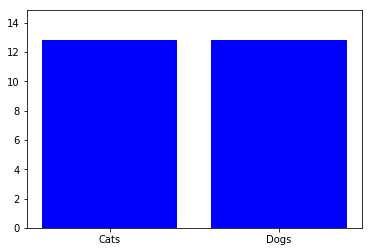

In [29]:
#Average days between Intake and Outcome by animal type
means=group_by_animal_type['Days between Intake and Outcome'].mean()
stds=group_by_animal_type['Days between Intake and Outcome'].std()

means[0:2]
stds

animals = ["Cats","Dogs"]
y_values = means[0:2]
std_values = stds[0:2]

plt.bar(animals, y_values, color='b')
plt.ylim(0,y_values.max()+2)
plt.show()
#Time from intake to outcome is practically identical. Dogs have a bit more variance

In [18]:
group_by_animal_type['Days between Intake and Outcome']

In [34]:
plt.boxplot(y_values)

{'boxes': [<matplotlib.lines.Line2D at 0x10cf68668>],
 'caps': [<matplotlib.lines.Line2D at 0x10cf68518>,
 'fliers': [<matplotlib.lines.Line2D at 0x10cf77cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10cf778d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10cf685c0>,
  <matplotlib.lines.Line2D at 0x10cf68080>]}

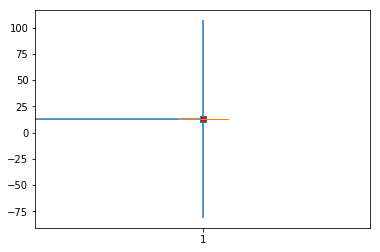

In [35]:
plt.show()

In [38]:
data=louisville_data['Days between Intake and Outcome']

plt.boxplot(data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x >

{'boxes': [<matplotlib.lines.Line2D at 0x10ca2be80>],
 'caps': [<matplotlib.lines.Line2D at 0x10ca37470>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ca20160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ca20c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ca2b400>,
  <matplotlib.lines.Line2D at 0x10ca2b5c0>]}

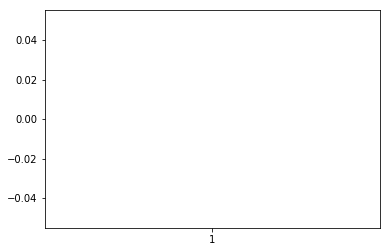

In [39]:
plt.show()